In [2]:
import time
import os
import cv2
import matplotlib.pyplot as plt
from lib.utilities import *
import numpy as np
import pandas as pd

In [14]:
data_dir = "C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/"

plt.rcParams.update({'font.size': 13})
#plt.rcParams['figure.figsize'] = [20, 12]

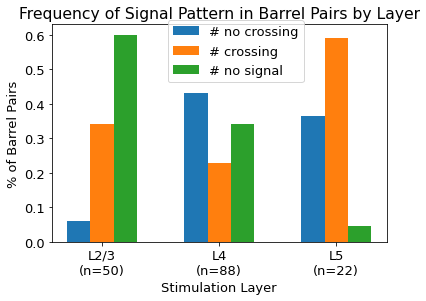

In [23]:
# Results 2/8/23 - 6/9/23
# in format # no crossing, # crossing, # no signal; l2/3, L4, L5
crossing_data = {
    "# no crossing": [3 / 50, 38 / 88,  8 / 22],
    '# crossing': [17 / 50,   20 / 88,  13 / 22],
    '# no signal': [30 / 50,  30 / 88,  1 / 22],
    #"L2/3": [3, 17, 30],
    #"L4": [38, 20, 30],
    #"L5": [8, 13, 1]
}

labels = [x for x in crossing_data.keys()]

# plot this as bars 
plt.clf()
i = 0
for nm in crossing_data:
    x = np.arange(3)
    if i == 1:
        plt.bar(x + (i-1) * 0.2, 
                crossing_data[nm],
                0.2,
                label=nm,
                tick_label=['L2/3\n(n=50)', 'L4\n(n=88)', 'L5\n(n=22)'])
    else:
        plt.bar(x + (i-1) * 0.2, 
                crossing_data[nm],
                0.2,
                label=nm)
    i += 1
    
plt.title("Frequency of Signal Pattern in Barrel Pairs by Layer")
plt.xlabel("Stimulation Layer")
plt.ylabel("% of Barrel Pairs")
#plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(0.55, 1.05), loc='upper center')
plt.savefig(data_dir + "results_count_prelim_6-9-23.png")
plt.show()

In [25]:
# work with latency data
# Load data, not from Drive for Desktop since PhotoZ complains about loading zda from Drive
csv_prefix = 'scnn1a_all_slices.csv'
csv_columns = ['Date',
             'Slice/Loc/Rec',
             'Stim Location',
             'L4 barrel 1 Latency',
             'L4 barrel 2 Latency',
             'L4 barrel 3 Latency',
             'L4 barrel 1 SNR',
             'L4 barrel 2 SNR',
             'L4 barrel 3 SNR',
             'ROI jpg',
              'Age',
              'Infusion',
              'Sex',
              'Stim (uA)',
              'Delta latency 1 (barrel 1 - barrel 2)',
              'Delta latency 2 (barrel 3 - barrel 2)']

# Load reference data for all slices
reference_file = "C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/scnn1a_catalog.csv"
reference_df = pd.read_csv(reference_file)
ref_cols = ['Age', 
          'Sex', 
          "Infusion", 
          'Stim (uA)']

# load the all-data CSV dir
df = pd.read_csv(data_dir + csv_prefix)
df = pd.DataFrame(df)
df

,Date,Slice/Loc/Rec,Stim Location,L4 barrel 1 Latency,L4 barrel 2 Latency,L4 barrel 3 Latency,L4 barrel 1 SNR,L4 barrel 2 SNR,L4 barrel 3 SNR,ROI jpg,Age,Infusion,Sex,Stim (uA),Delta latency 1 (barrel 1 - barrel 2),Delta latency 2 (barrel 3 - barrel 2)
0,2/28/2023,02_01_01,L5,50.3009,50.8406,49.3457,2.94039,10.63090,6.48439,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,NaN,-1.4949
1,2/28/2023,02_01_03,L5,50.6451,50.8291,49.8348,4.43717,9.88073,5.89912,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,NaN,-0.9943
2,2/28/2023,02_02_02,L5,49.9882,51.3212,51.1805,2.04521,5.14209,2.92133,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,NaN,NaN
3,2/28/2023,03_01_01,L2/3,52.5719,51.2136,52.9013,9.40509,10.23720,5.78093,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,1.3583,1.6877
4,2/28/2023,03_02_01,L2/3,51.6168,50.1283,50.9250,25.20450,27.82770,26.27210,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,58,NaN,M,100,1.4885,0.7967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,6/9/2023,02_05_05,L2/3,52.8847,52.7759,52.7034,2.94845,3.03057,1.13669,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,64,NaN,M,200,NaN,NaN
81,6/9/2023,02_05_07,L2/3,52.6646,52.2427,52.9754,2.51584,3.37059,1.51257,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,64,NaN,M,200,NaN,NaN
82,6/9/2023,02_05_08,L2/3,54.0270,53.9975,59.4641,3.84072,3.43322,2.53465,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,64,NaN,M,200,NaN,NaN
83,6/9/2023,02_05_09,L2/3,52.8899,52.2646,53.6709,3.11165,3.64487,1.58509,C:/Users/jjudge3/Desktop/Data/mm_full_pipeline...,64,NaN,M,200,NaN,NaN


Latency between barrel pairs in L2/3
	 1.098 +/- 0.542 (n = 17)
	 [1.3583 1.4885 1.8089 0.5078 0.5782 0.8922 0.7235 1.1776 0.4841 1.8474
 1.6877 0.7967 0.7226 1.9021 0.7541 0.2124 1.7317]
Latency between barrel pairs in L4
	 0.846 +/- 1.106 (n = 20)
	 [0.1687 1.0151 1.3033 2.096  0.826  0.012  3.7841 0.5839 0.456  0.8266
 0.477  0.2671 0.0656 0.0797 0.0584 0.0353 0.2154 3.7901 0.03   0.8443]
Latency between barrel pairs in L5
	 0.726 +/- 0.446 (n = 13)
	 [0.8933 0.1239 1.4173 0.5098 0.0111 1.4949 0.9943 0.784  0.5802 1.0574
 0.1154 0.724  0.7415]


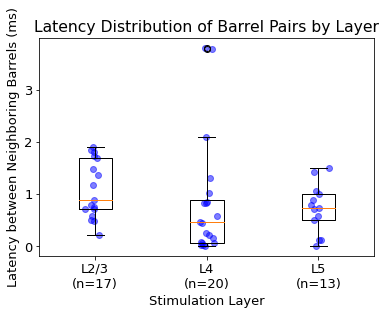

In [40]:
# plot latency spreads, separated by layer

df['abs(delta 1)'] = np.abs(df['Delta latency 1 (barrel 1 - barrel 2)'])
df['abs(delta 2)'] = np.abs(df['Delta latency 2 (barrel 3 - barrel 2)'])


plt.clf()
i = 1
xtick_labels = []
df_datasets = []
for stim_loc in ['L2/3', 'L4', 'L5']:
    df2 = df[df['Stim Location'].str.contains(stim_loc)]
    dfd1 = df2['abs(delta 1)'].dropna()
    dfd2 = df2['abs(delta 2)'].dropna()

    print("Latency between barrel pairs in", stim_loc)
    dfds = np.concatenate([dfd1, dfd2])
    print("\t", 
          str(np.mean(dfds))[:5], 
          "+/-", 
          str(np.std(dfds))[:5], 
          "(n =", 
          str(len(dfds)) + ")")
    print("\t", dfds)
    
    jittered_xs = np.random.normal(i, 0.04, dfds.shape[0])
    plt.scatter(jittered_xs, dfds, alpha=0.5, color='blue')

    xtick_labels.append(stim_loc + "\n(n=" + str(len(dfds)) +")")
    df_datasets.append(dfds)
    i += 1

plt.boxplot(df_datasets)
plt.xticks(range(1, len(xtick_labels)+1), xtick_labels)
plt.title("Latency Distribution of Barrel Pairs by Layer")
plt.xlabel("Stimulation Layer")
plt.ylabel("Latency between Neighboring Barrels (ms)")
plt.savefig(data_dir + "results_latency_prelim_6-9-23.png")
plt.show()

In [33]:
np.unique([3,3,3,4,5,6,6], return_inverse=True)

(array([3, 4, 5, 6]), array([0, 0, 0, 1, 2, 3, 3], dtype=int64))